In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import random

In [61]:
def small_world_network(n, k, p):
    # create a cycle graph
    G = nx.Graph()
    for i in range(n):
        G.add_edge(i, (i+1)%n)
    
    # expand a cycle graph
    half_k = k // 2
    for i in range(n):
        for j in range(1, half_k+1):
            G.add_edge(i, (i+j) % n)  
            G.add_edge(i, (i-j) % n)
    
    # rewire edges in graph
    edges = list(G.edges())
    num_edges = len(edges)
    num_edges = len(edges)
    num_rewire = int(num_edges * p)

    for edge in random.sample(edges, num_rewire):
        u, v = edge
        G.remove_edge(u, v)
    
        # define a direction of rewiring
        if random.random() < 0.5:
            new_u = u
            new_v = random.choice([node for node in G.nodes() if node != u and not G.has_edge(u, node)])
        else:
            new_v = v
            new_u = random.choice([node for node in G.nodes() if node != v and not G.has_edge(node, v)])

        G.add_edge(new_u, new_v)
    
    return G

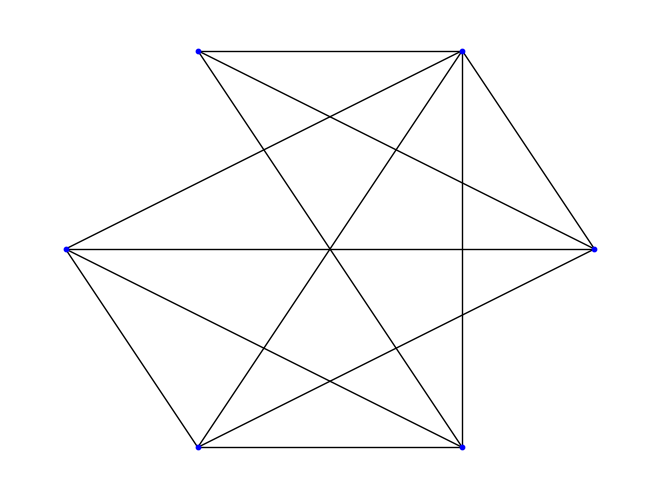

In [62]:
G = small_world_network(6, 4, 0.5)
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, node_size=10, node_color='blue')
plt.show()

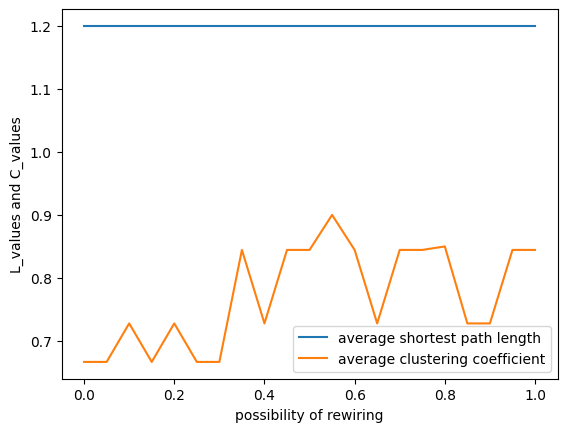

In [63]:
n = 6
k = 4

# create figure of L(p)-p, C(p)-p
p_value = np.arange(0, 1.05, 0.05)
L_value = []
C_value = []

for p in p_value:
    G = small_world_network(n, k, p)
    avg_shotest_path = nx.average_shortest_path_length(G)
    avg_cluster = nx.average_clustering(G)
    L_value.append(avg_shotest_path)
    C_value.append(avg_cluster)

x = p_value
plt.plot(x, np.array(L_value), label="average shortest path length")
plt.plot(x, np.array(C_value), label="average clustering coefficient")
plt.xlabel("possibility of rewiring")
plt.ylabel("L_values and C_values")
plt.legend()
plt.show()

[このサブグラフの内容](https://groups.google.com/g/networkx-discuss/c/mp5AEebIeKo)を参考にすると解決するかも
張り替えを繰り返していくうちにグラフは離れていって部分的なグラフのサブグラフを形成する可能性がある。その場合それをまとめて平均経路長などを求めることはできないので、サブグラフごとに経路長の合計を求めて、それを全て足した後に全体のノード数で割ると求まる、みたいなことを言ってるっぽい

# TODO
平均経路長が変化しないのはなぜ？そもそもあってる？
-> 平均経路長を計算する式を見てみる。その中に張り替えの途中で変化するパラメータが含まれていないなら変化しない可能性もある